# Individual Assignment 1 | Titanic Dataset

In [82]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher

## 🚢 Task 1: Titanic Dataset: Initial Exploration

The Titanic dataset contains information about passengers aboard the Titanic, including survival status, class, age, fare, and other details. The goal of this initial exploration is to:
- Load the dataset.
- Understand its structure and content.
- Identify missing values and potential issues.
- Visualize key aspects of the data.
- Answer key data analysis questions.

---


In [83]:
# Load dataset
data = pd.read_excel("titanic3.xls")

# Display the first few rows
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The dataset contains **1309 entries** and **14 columns**, covering various passenger attributes. Let's inspect the dataset structure and statistics.


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


The dataset includes both **numerical** (`age`, `fare`, etc.) and **categorical** (`sex`, `embarked`, etc.) variables. Missing values are present, particularly in `cabin`, `boat`, and `body`.


In [85]:
# Display summary statistics
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


The summary statistics reveal:
- **Age** ranges from 0.17 to 80 years.
- **Fare** has a maximum of **$512.33**, indicating some high-paying passengers.
- **Siblings/Spouses (sibsp)** and **Parents/Children (parch)** vary widely, with most passengers traveling alone.

---


In [86]:
# Display count of unique values in each column
for column in data.columns:
    print(f"\n{column}:")
    print(data[column].value_counts())



pclass:
pclass
3    709
1    323
2    277
Name: count, dtype: int64

survived:
survived
0    809
1    500
Name: count, dtype: int64

name:
name
Connolly, Miss. Kate             2
Kelly, Mr. James                 2
Allen, Miss. Elisabeth Walton    1
Ilmakangas, Miss. Ida Livija     1
Ilieff, Mr. Ylio                 1
                                ..
Hart, Miss. Eva Miriam           1
Harris, Mr. Walter               1
Harris, Mr. George               1
Harper, Rev. John                1
Zimmerman, Mr. Leo               1
Name: count, Length: 1307, dtype: int64

sex:
sex
male      843
female    466
Name: count, dtype: int64

age:
age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: count, Length: 98, dtype: int64

sibsp:
sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

parch:
parch
0    1002
1     170
2     113
3       8
4      

This helps identify categorical variables, repeated ticket numbers, and potential duplicates in passenger names.

---


### 1️⃣ Dataset Overview
- **Total Entries**: 1309
- **Total Columns**: 14
- **Target Variable**: `survived` (0 = No, 1 = Yes)

### 2️⃣ Data Dictionary
| Column    | Description |
|-----------|------------|
| survived  | Survival (0 = No, 1 = Yes) |
| pclass    | Passenger Class (1st, 2nd, 3rd) |
| name      | Passenger Name |
| sex       | Sex (Male/Female) |
| age       | Age of Passenger |
| sibsp     | Number of Siblings/Spouses Aboard |
| parch     | Number of Parents/Children Aboard |
| ticket    | Ticket Number |
| fare      | Passenger Fare |
| cabin     | Cabin Number (if known) |
| embarked  | Port of Embarkation (C, Q, S) |
| boat      | Lifeboat Number (if survived) |
| body      | Body Number (if recovered) |
| home.dest | Final Destination |


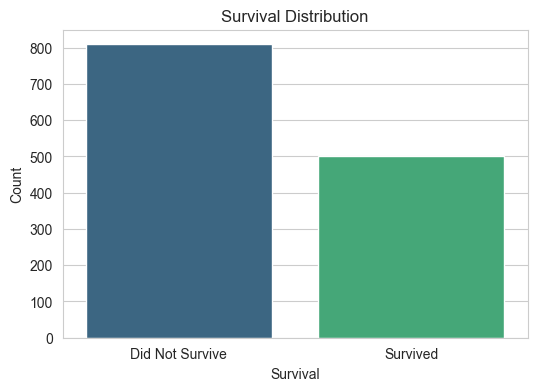

In [87]:
# Set visualization style
sns.set_style("whitegrid")

# Survival count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="survived", hue="survived", palette="viridis", legend=False)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.xlabel("Survival")
plt.ylabel("Count")
plt.title("Survival Distribution")
plt.show()

🔍 **Observation:**  
- More people **did not survive (61.8%)** than survived (38.2%).
- This class imbalance should be considered when training a predictive model.

---


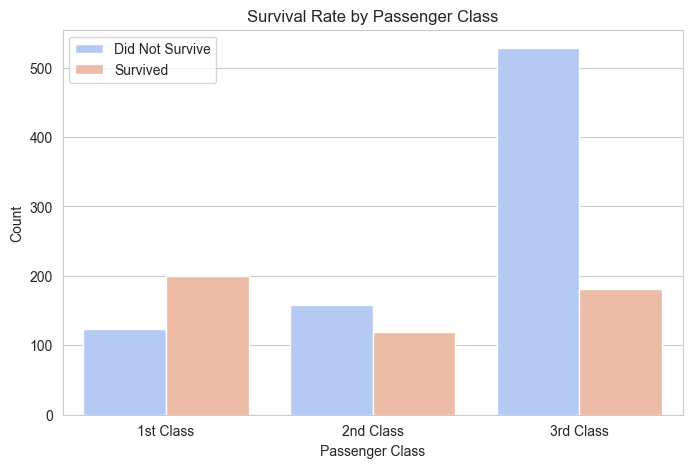

In [88]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data["pclass"], hue=data["survived"], palette="coolwarm")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Rate by Passenger Class")
plt.legend(["Did Not Survive", "Survived"])
plt.show()


🔍 **Observation:**  
- **1st Class passengers** had the highest survival rate.
- **3rd Class passengers** had the lowest survival rate, indicating socioeconomic factors played a role.

---


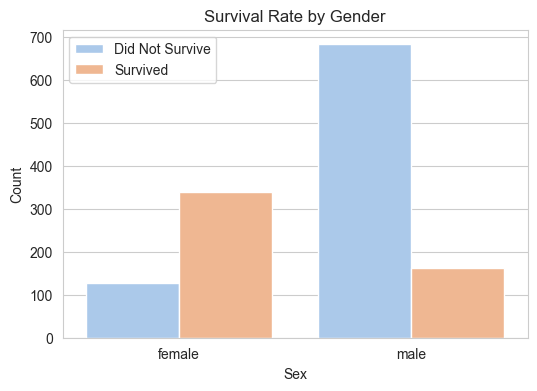

In [89]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["sex"], hue=data["survived"], palette="pastel")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival Rate by Gender")
plt.legend(["Did Not Survive", "Survived"])
plt.show()


🔍 **Observation:**  
- **Females had a significantly higher survival rate** than males.
- This aligns with the **"women and children first"** principle used during evacuation.

---


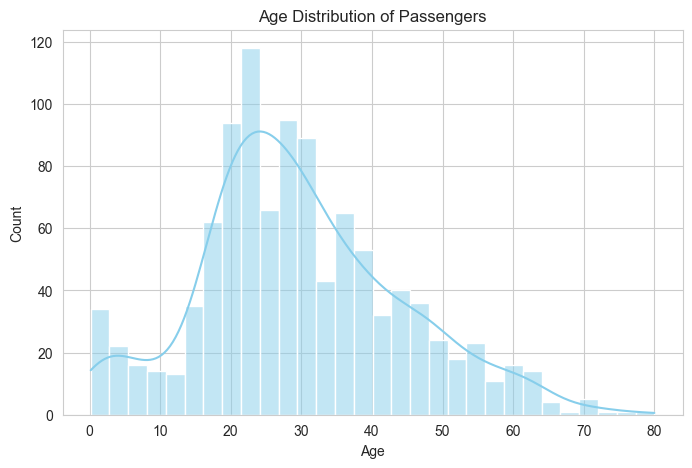

In [90]:
plt.figure(figsize=(8, 5))
sns.histplot(data["age"].dropna(), bins=30, kde=True, color="skyblue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.show()


🔍 **Observation:**  
- Most passengers were between **20-40 years old**.
- A few **elderly passengers (above 60)** were aboard.

---


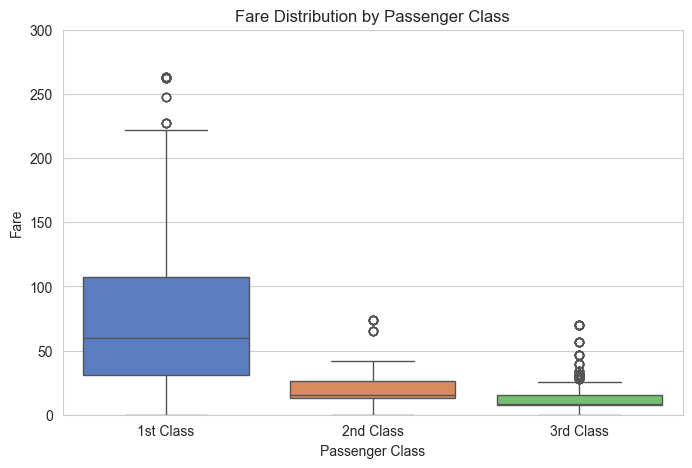

In [91]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="pclass", y="fare", hue="pclass", palette="muted", legend=False)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Class")
plt.ylim(0, 300)  # Limiting y-axis to remove extreme outliers
plt.show()


🔍 **Observation:**  
- **1st Class passengers paid the highest fares**, sometimes exceeding **$300**.
- **3rd Class passengers paid significantly lower fares**.

---


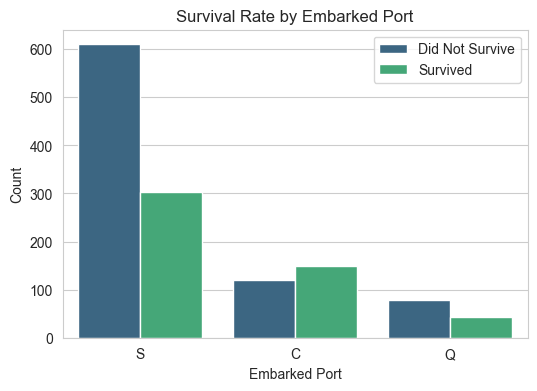

In [92]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["embarked"], hue=data["survived"], palette="viridis")
plt.xlabel("Embarked Port")
plt.ylabel("Count")
plt.title("Survival Rate by Embarked Port")
plt.legend(["Did Not Survive", "Survived"])
plt.show()


🔍 **Observation:**  
- Passengers embarking from **Cherbourg (C) had a higher survival rate**.
- Most passengers embarked at **Southampton (S)**.

---


### Answering key questions from the slides
#### 1️⃣ Are the data tidy?
The dataset is **mostly tidy**, but some columns require **cleaning**:
- **Cabin**: Multiple cabin values in a single cell.
- **Boat**: Some passengers listed with multiple lifeboats.
- **Ticket**: Needs feature extraction.

✅ **Verdict**: **Mostly tidy**, but requires **feature engineering**.

---

#### 2️⃣ Are the data tidy but incomplete?
Several columns have missing values:
| Column      | Missing Values | % Missing |
|------------|----------------|-----------|
| age        | 263            | 20.1%     |
| fare       | 1              | <0.1%     |
| embarked   | 2              | 0.15%     |
| cabin      | 1014           | 77.5%     |
| boat       | 823            | 62.8%     |
| body       | 1188           | 90.8%     |
| home.dest  | 564            | 43.1%     |

✅ **Verdict**: **Yes, data are incomplete.** Imputation is required.

---

#### 3️⃣ Are the data tidy but with duplicates?
Potential duplicates exist:
- `name`: 1307 unique values for 1309 rows.
- `ticket`: Some tickets shared among passengers.
- `cabin`: Potential inconsistencies.

✅ **Verdict**: **Possible duplicates** in `Name` and `Ticket`.

---

#### 4️⃣ Are the data expired or outdated?
The dataset **represents a historical event (1912)**, so **expiration is not a concern**.

✅ **Verdict**: **No risk of outdated data**.

---

#### 5️⃣ Are the data incomplete or unrepresentative?
- **Survival rates are imbalanced** (38.2% survived, 61.8% did not).
- **Missing data may introduce bias**.

✅ **Verdict**: **Dataset is incomplete and may not fully represent survival patterns**.

---

#### 6️⃣ Is the data source known?
The **Titanic dataset is well-documented** and sourced from **passenger records**.

✅ **Verdict**: **Yes, the source is known**.

---

#### 7️⃣ Were gender data manually inputted or derived?
- The **`sex` column is manually recorded**.
- No automated classifier used.

✅ **Verdict**: **Gender data is reliable**.

---

#### 8️⃣ Is there data leakage?
- **Boat column** indirectly reveals survival status.
- **Body column** only recorded for deceased passengers.

✅ **Verdict**: **Yes, potential leakage. Drop `Boat` and `Body`**.

---

#### 9️⃣ Are the data reliable?
- **Survival labels** are historically accurate.
- **Potential inconsistencies** in `home.dest` and `cabin`.

✅ **Verdict**: **Mostly reliable, but some validation needed**.

---

#### **📌 Final Summary**
| **Issue**                | **Status**                | **Recommended Action**                                   |
|--------------------------|--------------------------|----------------------------------------------------------|
| **Tidy Data**            | Mostly tidy              | Feature engineering for `Cabin`, `Boat`, `Ticket`       |
| **Missing Data**         | Yes                      | Impute `Age`, `Fare`, `Embarked`                        |
| **Duplicates**           | Possibly                 | Check `Name`, `Ticket` for duplicates                   |
| **Outdated Data**        | No                       | Not an issue                                            |
| **Unrepresentative Data**| Yes                      | Missing data may introduce bias                         |
| **Data Leakage?**        | Yes                      | Drop `Boat` and `Body`                                  |
| **Data Reliability?**    | Generally reliable       | Validate labels                                         |


## 📌 Task 2: Managing Missing Values  

The Titanic dataset contains missing values that must be handled to ensure **data integrity** and **model accuracy**. The goal of this section is to:
- Identify and analyze missing values.  
- Apply appropriate **imputation** or remove columns if necessary.  
- Verify that no missing values remain.  

Proper handling prevents **bias** and ensures the dataset is **ready for feature engineering and modeling**. 🚀  

---


### 📊 Step 1: Identifying Missing Values

Before handling missing values, we first identify **which columns contain missing data** and their percentage. Understanding missing values is crucial to selecting the best imputation strategy.



Missing Values Summary:
           Missing Values  Percentage
body                 1188   90.756303
cabin                1014   77.463713
boat                  823   62.872422
home.dest             564   43.086325
age                   263   20.091673
embarked                2    0.152788
fare                    1    0.076394
pclass                  0    0.000000
survived                0    0.000000
name                    0    0.000000
sex                     0    0.000000
sibsp                   0    0.000000
parch                   0    0.000000
ticket                  0    0.000000


<Figure size 1000x500 with 0 Axes>

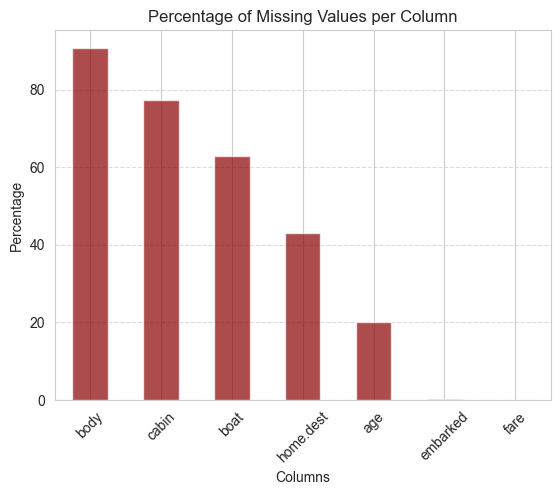

In [93]:
# Count missing values and percentage
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage
}).sort_values(by="Percentage", ascending=False)

# Display missing values summary
print("Missing Values Summary:")
print(missing_df)

# Plot missing values
plt.figure(figsize=(10, 5))
missing_df[missing_df["Missing Values"] > 0].sort_values(by="Percentage", ascending=False).plot(
    kind="bar", y="Percentage", legend=False, color="darkred", alpha=0.7
)
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### 🛠 Step 2: Strategy for Handling Missing Values

Now that we have identified missing values, we must decide the best approach to handle them. The strategy depends on:
1. The **importance of the column** for survival prediction.
2. The **percentage of missing data**—if too high, the column may be dropped.
3. Whether missing values are **random or systematic**, which can impact predictive modeling.

Below is the **selected strategy for each column**:



| Column     | Imputation Strategy         | Justification |
|------------|----------------------------|---------------|
| **Boat, Body, Home.dest** | **Drop the column** | `Boat` and `Body` cause **data leakage**. `Home.dest` is not essential. |
| **Age**    | **Mean Imputation**         | Age follows a **normal distribution**, so using the mean retains its distribution. |
| **Fare**   | **Median Imputation**       | Median is **robust to outliers**, ensuring no skewing by extreme fares. |
| **Embarked** | **Mode Imputation**       | Since it’s **categorical**, missing values are replaced with the most common port. |
| **Cabin**  | **New Category ("Unknown")** | `Cabin` may impact survival (higher-class cabins had better survival chances), so we keep it with an `"Unknown"` category instead of dropping it. |


### 🗑 Step 3.1: Dropping Columns with High Missing Values
Columns with excessive missing values that **do not contribute to predictive modeling** are removed.


In [94]:
# Drop Boat, Body, and Home.dest columns due to high missing values and potential leakage
data.drop(columns=['boat', 'body', 'home.dest'], inplace=True)


✅ **Dropped columns**:
- `Boat` (directly indicates survival).
- `Body` (only recorded for deceased passengers).
- `Home.dest` (not relevant to survival).

---


### 🚢 Step 3.2: Handling Categorical Missing Values - Embarked
Since **only two values** are missing, we replace them with the most common value.


In [95]:
# Fill missing values in 'embarked' with the most common value (mode)
most_common_embarked = data["embarked"].mode().iloc[0]  # Using iloc is more explicit
data["embarked"] = data["embarked"].fillna(most_common_embarked)  # Avoid inplace=True

✅ **Filled missing values in Embarked** using **mode (most common port).**
- Most frequent value: `S` (Southampton).

---


### 🏠 Step 3.3: Handling Cabin - Assigning "Unknown" Category
The `Cabin` column has **77.5% missing values**. Instead of dropping, we assign **"Unknown"** to retain information.


In [96]:
# Replace missing cabin values with "Unknown"
data["cabin"] = data["cabin"].fillna("Unknown")


✅ **Assigned "Unknown" category for missing cabins.**
- Ensures **no data loss** while keeping useful information.

---


### 📏 Step 3.4: Handling Age - Mean Imputation
Age is a **continuous variable** with **20.1% missing values**. We replace missing values with the **mean age**.


In [97]:
# Calculate mean age and fill missing values
mean_age = data["age"].mean()
data["age"] = data["age"].fillna(mean_age)

✅ **Filled missing Age values with the mean (`~29.88 years`).**
- This keeps the **distribution intact** while avoiding bias.

---


### 💰 Step 3.5: Handling Fare - Median Imputation
Since only **one fare** is missing, we replace it with the **median** to prevent outliers from skewing the data.


In [98]:
# Calculate median fare and fill missing values
median_fare = data["fare"].median()
data["fare"] = data["fare"].fillna(median_fare)


✅ **Filled missing Fare value with median (`~14.45`).**
- Median is **robust to extreme fares**.

---


### 🔍 Step 4: Verifying Data After Handling Missing Values
To ensure all missing values have been handled correctly, we re-check the dataset.


In [99]:
# Check for any remaining missing values
missing_after_cleaning = data.isnull().sum()

# Filter only columns with missing values
missing_after_cleaning = missing_after_cleaning[missing_after_cleaning > 0]

# Display results
if missing_after_cleaning.empty:
    print("✅ No missing values remain in the dataset.")
else:
    print("⚠️ Columns with remaining missing values:")
    print(missing_after_cleaning)


✅ No missing values remain in the dataset.


## 📌 Task 3: Encoding Categorical Variables

Machine learning models typically require **numerical inputs**, so categorical variables must be transformed into numerical representations.  
In this step, we:  
- **Identify categorical variables** in the dataset.  
- **Apply OneHotEncoder** to convert them into numerical form.  
- **Discuss the impact** of encoding on model performance.  
---


### 📊 Step 1: Identifying Categorical Variables

In [100]:
# Identify categorical variables (excluding dropped columns)
categorical_columns = data.select_dtypes(include=["object"]).columns
print("Categorical Variables:", list(categorical_columns))


Categorical Variables: ['name', 'sex', 'ticket', 'cabin', 'embarked']


we are going to stay with sex, cabin and embarked scince ticket (their ticket number) and name are not relevant for the ml training.

In [101]:
# Drop the 'name' column from the dataset
data.drop(columns=['name'], inplace=True)
data.drop(columns=['ticket'], inplace=True)

### 🛠 Step 2: Choosing the Encoding Method

Based on **lecture slides**, we apply:
| Column   | Encoding Method | Justification |
|----------|----------------|---------------|
| **sex**  | One-Hot Encoding | Binary categorical (0/1), simple transformation. |
| **embarked** | One-Hot Encoding | Small number of unique values (`C`, `Q`, `S`). |
| **cabin**  | Label Encoding | Too many unique values, better handled as categorical numbers. |

---


### 🎭 Step 3.1: One-Hot Encoding for "sex" and "embarked"

Since "sex" and "embarked" have **a small number of categories**, One-Hot Encoding converts them into **binary columns**.


In [102]:
# Select columns for One-Hot Encoding
one_hot_columns = ["sex", "embarked"]
encoder = OneHotEncoder(sparse_output=False, drop="first")  # Avoids multicollinearity

# Fit and transform data
encoded_features = encoder.fit_transform(data[one_hot_columns])

# Convert to DataFrame with meaningful column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(one_hot_columns))

# Drop original categorical columns and merge encoded features
data = data.drop(columns=one_hot_columns).reset_index(drop=True)
data = pd.concat([data, encoded_df], axis=1)

In [103]:
data.head()

,pclass,survived,age,sibsp,parch,fare,cabin,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,B5,0.0,0.0,1.0
1,1,1,0.9167,1,2,151.5500,C22 C26,1.0,0.0,1.0
2,1,0,2.0000,1,2,151.5500,C22 C26,0.0,0.0,1.0
3,1,0,30.0000,1,2,151.5500,C22 C26,1.0,0.0,1.0
4,1,0,25.0000,1,2,151.5500,C22 C26,0.0,0.0,1.0


✅ **Applied One-Hot Encoding**
- Converted **"sex"** to `sex_male` (0 = female, 1 = male).
- Converted **"embarked"** into binary columns (`embarked_Q`, `embarked_S`).


### 🏠 Step 3.2: Label Encoding for "Cabin"

Since **Cabin has many unique values**, we assign a **numerical category** to each unique cabin ID.


In [104]:
# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform Cabin column
data["cabin"] = label_encoder.fit_transform(data["cabin"])


In [105]:
data.head()

,pclass,survived,age,sibsp,parch,fare,cabin,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,43,0.0,0.0,1.0
1,1,1,0.9167,1,2,151.5500,79,1.0,0.0,1.0
2,1,0,2.0000,1,2,151.5500,79,0.0,0.0,1.0
3,1,0,30.0000,1,2,151.5500,79,1.0,0.0,1.0
4,1,0,25.0000,1,2,151.5500,79,0.0,0.0,1.0


✅ **Applied Label Encoding**
- Each `cabin` is now represented by a **unique number**.
- Helps models **interpret cabin information** while reducing dimensionality.


### 🔍 Step 4: Verifying Encoded Data

After encoding, we check that:
1. **Original categorical columns are removed**.
2. **Newly encoded numerical features exist**.


In [106]:
print("Final Dataset Columns:")
print(data.columns)


Final Dataset Columns:
Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'cabin',
       'sex_male', 'embarked_Q', 'embarked_S'],
      dtype='object')


| Column   | Encoding Method | Justification |
|----------|----------------|---------------|
| **sex**  | One-Hot Encoding | Binary categorical (0/1), simple transformation. |
| **embarked** | One-Hot Encoding | Small number of unique values (`C`, `Q`, `S`). |
| **cabin**  | Label Encoding | Too many unique values, better handled as categorical numbers. |

🚀 **Outcome:**
- **No categorical variables remain.**
- **Dataset is now fully numerical and ready for ML modeling!**  


In [108]:
data.head()

,pclass,survived,age,sibsp,parch,fare,cabin,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,43,0.0,0.0,1.0
1,1,1,0.9167,1,2,151.5500,79,1.0,0.0,1.0
2,1,0,2.0000,1,2,151.5500,79,0.0,0.0,1.0
3,1,0,30.0000,1,2,151.5500,79,1.0,0.0,1.0
4,1,0,25.0000,1,2,151.5500,79,0.0,0.0,1.0
